In [1]:
import urllib
from urllib import request
import requests
import numpy as np
import pandas as pd
import geopandas as gpd
import scipy
import os
import sys
import json
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.plotting import figure
import zipfile

In [2]:
url = 'https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD'
tonn = pd.read_csv(url)

In [3]:
tonn.head(2)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,2017 / 09,Bronx,6,2118.4,115.2,169.1,NaN,58.7,NaN,NaN,2
1,2017 / 09,Bronx,9,3820.2,199.4,321.2,NaN,NaN,NaN,NaN,2


In [4]:
tonn.columns

Index(['MONTH', 'BOROUGH', 'COMMUNITYDISTRICT', 'REFUSETONSCOLLECTED',
       'PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED', 'RESORGANICSTONS',
       'SCHOOLORGANICTONS', 'LEAVESORGANICTONS', 'XMASTREETONS', 'BOROUGH_ID'],
      dtype='object')

In [5]:
tonn.MONTH.unique()

array(['2017 / 09', '2017 / 10', '2017 / 11', '2017 / 12', '2018 / 01',
       '2018 / 02', '2018 / 03', '2018 / 04', '2018 / 05', '2018 / 06',
       '2018 / 07', '2018 / 08', '2018 / 09', '2018 / 10'], dtype=object)

In [6]:
tonn=tonn.drop([
       'SCHOOLORGANICTONS', 'LEAVESORGANICTONS'], axis=1)

In [7]:
tonn = tonn.drop(tonn[tonn.MONTH=='2018 / 10'].index)

In [8]:
tonn.MONTH.unique()

array(['2017 / 09', '2017 / 10', '2017 / 11', '2017 / 12', '2018 / 01',
       '2018 / 02', '2018 / 03', '2018 / 04', '2018 / 05', '2018 / 06',
       '2018 / 07', '2018 / 08', '2018 / 09'], dtype=object)

In [9]:
# Splitting data for 5 boroughs

tonn_mn=tonn[tonn.BOROUGH=='Manhattan']
tonn_bk=tonn[tonn.BOROUGH=='Brooklyn']
tonn_qns=tonn[tonn.BOROUGH=='Queens']
tonn_si=tonn[tonn.BOROUGH=='Staten Island']
tonn_bx=tonn[tonn.BOROUGH=='Bronx']

In [10]:
tonn_mn.head()

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,XMASTREETONS,BOROUGH_ID
10,2017 / 10,Manhattan,4,2423.1,431.9,356.8,NaN,NaN,1
12,2017 / 10,Manhattan,11,2245.2,197.3,175.2,NaN,NaN,1
15,2017 / 10,Manhattan,6,2944.2,511.1,377.8,19.2,NaN,1
17,2017 / 10,Manhattan,9,2289.7,246.2,232.0,28.9,NaN,1
19,2017 / 11,Manhattan,6,2888.7,571.6,435.5,29.8,NaN,1


In [11]:
# Manhattan Data:
paper_mn=tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].mean()
gm_mn=tonn_mn.groupby('MONTH')['MGPTONSCOLLECTED'].mean()
trash_mn=tonn_mn.groupby('MONTH')['REFUSETONSCOLLECTED'].mean()

In [12]:
# Brooklyn Data:
paper_bk=tonn_bk.groupby('MONTH')['PAPERTONSCOLLECTED'].mean()
gm_bk=tonn_bk.groupby('MONTH')['MGPTONSCOLLECTED'].mean()
trash_bk=tonn_bk.groupby('MONTH')['REFUSETONSCOLLECTED'].mean()

In [13]:
# Queens Data:
paper_qns=tonn_qns.groupby('MONTH')['PAPERTONSCOLLECTED'].mean()
gm_qns=tonn_qns.groupby('MONTH')['MGPTONSCOLLECTED'].mean()
trash_qns=tonn_qns.groupby('MONTH')['REFUSETONSCOLLECTED'].mean()

In [14]:
# Staten Island Data:
paper_si=tonn_si.groupby('MONTH')['PAPERTONSCOLLECTED'].mean()
gm_si=tonn_si.groupby('MONTH')['MGPTONSCOLLECTED'].mean()
trash_si=tonn_si.groupby('MONTH')['REFUSETONSCOLLECTED'].mean()

In [15]:
# Bronx Data:
paper_bx=tonn_bx.groupby('MONTH')['PAPERTONSCOLLECTED'].mean()
gm_bx=tonn_bx.groupby('MONTH')['MGPTONSCOLLECTED'].mean()
trash_bx=tonn_bx.groupby('MONTH')['REFUSETONSCOLLECTED'].mean()

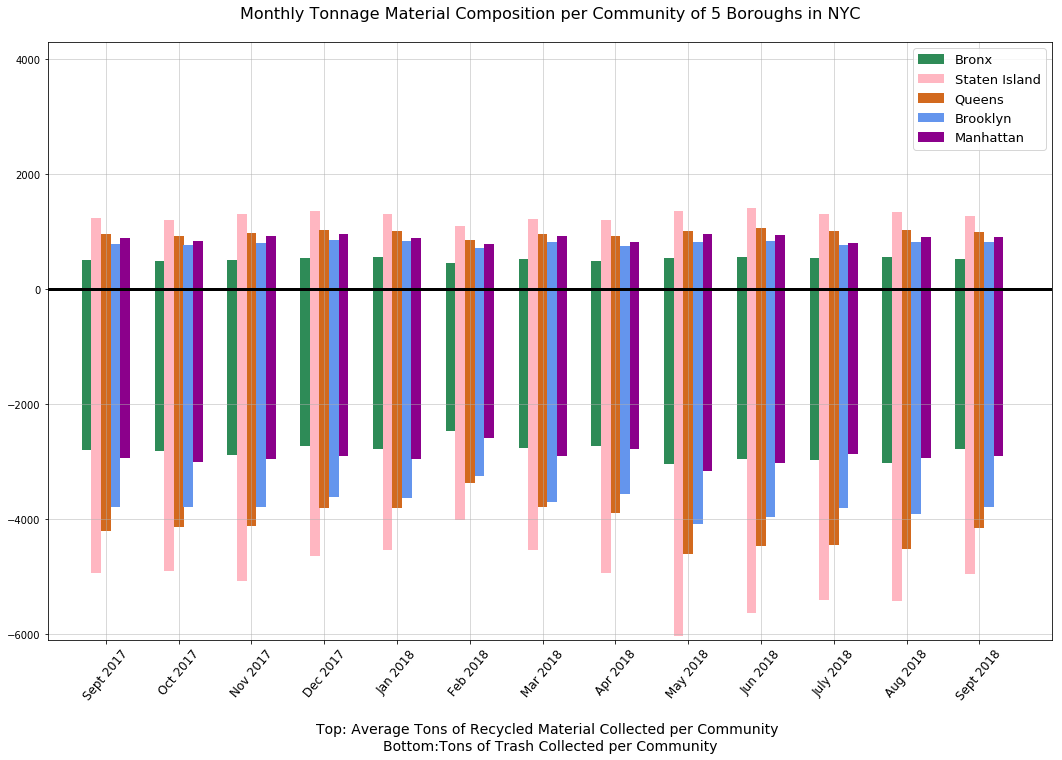

In [16]:
# Reference: https://chrisalbon.com/python/data_visualization/matplotlib_back_to_back_bar_plot/
# Reference: https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html

y1 = paper_mn+gm_mn
y2 = paper_bk+gm_bk
y3 = paper_qns+gm_qns
y4 = paper_si+gm_si
y5 = paper_bx+gm_bx
y6 = trash_mn
y7 = trash_bk
y8 = trash_qns
y9 = trash_si
y10 = trash_bx

# Create the bar labels
bar_labels = ['Sept 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017', 'Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018',
             'Jun 2018', 'July 2018', 'Aug 2018', 'Sept 2018']

# Create a figure

plt.figure(figsize=(18,11))

# Set the y position
#x_pos = np.arange(len(y1))
#x_pos = [y for y in x_pos]
ind = np.arange(len(y1)) 
plt.xticks(ind, bar_labels, fontsize=12)


width = 0.2

# Create a horizontal bar in the position y_pos



bx=plt.bar(ind - 1.32*width, y5, width/1.5, align='center', color='#2E8B57')

si=plt.bar(ind - 0.66*width, y4, width/1.5, align='center', color='#FFB6C1')
qns=plt.bar(ind, y3, width/1.5, align='center', color='#D2691E')
bk=plt.bar(ind + 0.66*width, y2, width/1.5,align='center', color='#6495ED')
mn=plt.bar(ind+1.32*width, y1, width/1.5, align='center', color='#8B008B')

bx_t=plt.bar(ind - 1.32*width, -y10, width/1.5, align='center', color='#2E8B57', alpha=1)
si_t=plt.bar(ind - 0.66*width, -y9, width/1.5, align='center', color='#FFB6C1', alpha=1)
qns_t=plt.bar(ind, -y8, width/1.5, align='center', color='#D2691E', alpha=1)
bk_t=plt.bar(ind + 0.66*width, -y7, width/1.5, align='center', color='#6495ED', alpha=1)
mn_t=plt.bar(ind+1.32*width, -y6, width/1.5, align='center', color='#8B008B', alpha=1)




# annotation and labels

plt.xlabel('\nTop: Average Tons of Recycled Material Collected per Community \nBottom:Tons of Trash Collected per Community', horizontalalignment='center',fontsize=14)
t = plt.title('Monthly Tonnage Material Composition per Community of 5 Boroughs in NYC\n', fontsize=16)
plt.xlim([-0.8,len(y1)])
plt.xticks(rotation=50)
plt.ylim([-6100, 4300])
plt.yticks()
plt.legend(['Bronx','Staten Island', 'Queens', 'Brooklyn', 'Manhattan'], fontsize=13,loc=1)

plt.plot([-10,13.1],[0,0], 'k', linewidth=3)

plt.grid(alpha=0.6)

plt.show()

## The above plot does not have strong contrasting of each month but would be interesting to compare between boroughs per capita. 

In [17]:
# Import population data
url_p='https://data.cityofnewyork.us/api/views/xywu-7bv9/rows.csv?accessType=DOWNLOAD'
pop=pd.read_csv(url_p)

In [18]:
pop.head()

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,...,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
0,Total Population,NYC Total,7891957,100.00,7781984,100.00,7894862,100.00,7071639,100.00,...,8008278,100.00,8242624,100.00,8550971,100.00,8821027,100.00,9025145,100.00
1,Total Population,Bronx,1451277,18.39,1424815,18.31,1471701,18.64,1168972,16.53,...,1332650,16.64,1385108,16.80,1446788,16.92,1518998,17.22,1579245,17.50
2,Total Population,Brooklyn,2738175,34.70,2627319,33.76,2602012,32.96,2230936,31.55,...,2465326,30.78,2552911,30.97,2648452,30.97,2754009,31.22,2840525,31.47
3,Total Population,Manhattan,1960101,24.84,1698281,21.82,1539233,19.50,1428285,20.20,...,1537195,19.20,1585873,19.24,1638281,19.16,1676720,19.01,1691617,18.74
4,Total Population,Queens,1550849,19.65,1809578,23.25,1986473,25.16,1891325,26.75,...,2229379,27.84,2250002,27.30,2330295,27.25,2373551,26.91,2412649,26.73


In [19]:
pop.columns

Index(['Age Group', 'Borough', '1950', '1950 - Boro share of NYC total',
       '1960', '1960 - Boro share of NYC total', '1970',
       '1970 - Boro share of NYC total', '1980',
       '1980 - Boro share of NYC total', '1990',
       '1990 - Boro share of NYC total', '2000',
       '2000 - Boro share of NYC total', '2010',
       '2010 - Boro share of NYC total', '2020',
       '2020 - Boro share of NYC total', '2030',
       '2030 - Boro share of NYC total', '2040',
       '2040 - Boro share of NYC total'],
      dtype='object')

In [20]:
# We are only interested in the year that is the closest to the tonnage data year so deleting others.
# Keeping 2010 data
pop = pop.drop(['Age Group', '1950', '1950 - Boro share of NYC total',
       '1960', '1960 - Boro share of NYC total', '1970',
       '1970 - Boro share of NYC total', '1980',
       '1980 - Boro share of NYC total', '1990',
       '1990 - Boro share of NYC total', '2000',
       '2000 - Boro share of NYC total', '2020',
       '2020 - Boro share of NYC total', '2030',
       '2030 - Boro share of NYC total', '2040',
       '2040 - Boro share of NYC total'], axis=1)

In [21]:
pop.head()

,Borough,2010,2010 - Boro share of NYC total
0,NYC Total,8242624,100.00
1,Bronx,1385108,16.80
2,Brooklyn,2552911,30.97
3,Manhattan,1585873,19.24
4,Queens,2250002,27.30


In [22]:
pop.groupby('Borough')['2010'].sum()

Borough
   Bronx            1385108
   Brooklyn         2552911
   Manhattan        1585873
   Queens           2250002
   Staten Island     468730
NYC Total           8242624
Name: 2010, dtype: int64

In [23]:
pop_mn=pop.groupby('Borough')['2010'].sum()[2]
pop_bk=pop.groupby('Borough')['2010'].sum()[1]
pop_qns=pop.groupby('Borough')['2010'].sum()[3]
pop_si=pop.groupby('Borough')['2010'].sum()[4]
pop_bx=pop.groupby('Borough')['2010'].sum()[0]

In [24]:
# Manhattan Data:
#paper_mn=1000*tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()/pop_mn
#gm_mn=1000*tonn_mn.groupby('MONTH')['MGPTONSCOLLECTED'].sum()/pop_mn
#trash_mn=1000*tonn_mn.groupby('MONTH')['REFUSETONSCOLLECTED'].sum()/pop_mn
#paper_mn

In [25]:
#paper_mn.plot()
#gm_mn.plot()

In [26]:
# Brooklyn Data:
#paper_bk=1000*tonn_bk.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()/pop_bk
#gm_bk=1000*tonn_bk.groupby('MONTH')['MGPTONSCOLLECTED'].sum()/pop_bk
#trash_bk=1000*tonn_bk.groupby('MONTH')['REFUSETONSCOLLECTED'].sum()/pop_bk
#paper_bk

In [27]:
#paper_bk.plot()
#gm_bk.plot()

In [28]:
# Queens Data:
#paper_qns=1000*tonn_qns.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()/pop_qns
#gm_qns=1000*tonn_qns.groupby('MONTH')['MGPTONSCOLLECTED'].sum()/pop_qns
#trash_qns=1000*tonn_qns.groupby('MONTH')['REFUSETONSCOLLECTED'].sum()/pop_qns
#paper_qns
#gm_qns

In [29]:
#paper_qns.plot()
#gm_qns.plot()

In [30]:
#tonn_mn_summer = tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()[9]+tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()[10]+tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()[11]
#1000*tonn_mn_summer/pop.groupby('Borough')['2010'].sum()[2]

In [31]:
#tonn_mn_winter = tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()[3]+tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()[4]+tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()[5]
#1000*tonn_mn_winter/pop.groupby('Borough')['2010'].sum()[2]

In [32]:
#tonn_mn_autumn = tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()[0]+tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()[1]+tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()[2]
#1000*tonn_mn_autumn/pop.groupby('Borough')['2010'].sum()[2]

In [33]:
#tonn_mn_spring = tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()[6]+tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()[7]+tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].sum()[8]
#1000*tonn_mn_spring/pop.groupby('Borough')['2010'].sum()[2]

In [34]:
# Manhattan Data:
re_mn_pc=(tonn_mn['PAPERTONSCOLLECTED'].sum()+tonn_mn['MGPTONSCOLLECTED'].sum())/pop.groupby('Borough')['2010'].sum()[2]
trash_mn_pc=tonn_mn['REFUSETONSCOLLECTED'].sum()/pop.groupby('Borough')['2010'].sum()[2]

In [35]:
# Brooklyn Data:
re_bk_pc=(tonn_bk['PAPERTONSCOLLECTED'].sum()+tonn_bk['MGPTONSCOLLECTED'].sum())/pop.groupby('Borough')['2010'].sum()[1]
trash_bk_pc=tonn_bk['REFUSETONSCOLLECTED'].sum()/pop.groupby('Borough')['2010'].sum()[1]

In [36]:
# Queens Data:
re_qns_pc=(tonn_qns['PAPERTONSCOLLECTED'].sum()+tonn_qns['MGPTONSCOLLECTED'].sum())/pop.groupby('Borough')['2010'].sum()[3]

trash_qns_pc=tonn_qns['REFUSETONSCOLLECTED'].sum()/pop.groupby('Borough')['2010'].sum()[3]

In [37]:
# Staten Island Data:
re_si_pc=(tonn_si['PAPERTONSCOLLECTED'].sum()+tonn_si['MGPTONSCOLLECTED'].sum())/pop.groupby('Borough')['2010'].sum()[4]
trash_si_pc=tonn_si['REFUSETONSCOLLECTED'].sum()/pop.groupby('Borough')['2010'].sum()[4]

In [38]:
# Bronx Data:
re_bx_pc=(tonn_bx['PAPERTONSCOLLECTED'].sum()+tonn_bx['MGPTONSCOLLECTED'].sum())/pop.groupby('Borough')['2010'].sum()[0]
trash_bx_pc=tonn_bx['REFUSETONSCOLLECTED'].sum()/pop.groupby('Borough')['2010'].sum()[0]

In [39]:
# Putting into a pandas table
data = {'Borough': ['Bronx','Staten Island', 'Queens', 'Brooklyn', 'Manhattan'],
        'Annual Recycled Material per capita(kg)': [re_bx_pc*1000, re_si_pc*1000, re_qns_pc*1000, re_bk_pc*1000, re_mn_pc*1000],
        'Annual Trash per capita(kg)': [trash_bx_pc*1000, trash_si_pc*1000, trash_qns_pc*1000, trash_bk_pc*1000, trash_mn_pc*1000]}
nyc = pd.DataFrame(data, columns = ['Borough', 'Annual Recycled Material per capita(kg)', 'Annual Trash per capita(kg)'])
nyc

,Borough,Annual Recycled Material per capita(kg),Annual Trash per capita(kg)
0,Bronx,58.946956,318.196343
1,Staten Island,106.099034,416.317710
2,Queens,79.238418,331.890283
3,Brooklyn,73.310233,343.199273
4,Manhattan,87.369102,287.078789


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


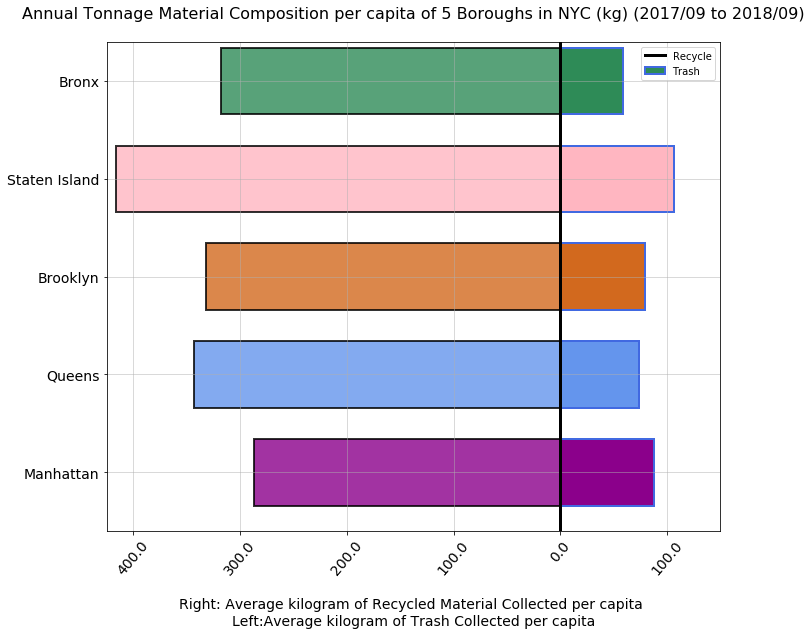

In [40]:
x1=nyc.ix[:4,1]
x2=nyc.ix[:4,2]
#y2=nyc.ix[1,1:]
#y3=nyc.ix[2,1:]
#y4=nyc.ix[3,1:]
#y5=nyc.ix[4,1:]

# Bar labels for each borough
bar_labels = ['Manhattan','Queens', 'Brooklyn', 'Staten Island', 'Bronx']

plt.figure(figsize=(11,9))

# Set the y position
y_pos = np.arange(len(x1))
plt.yticks(y_pos, bar_labels, fontsize=12)


width = 0.68

# Create a horizontal bar in the position y_pos
color_dict={'#2E8B57','#FFB6C1','#D2691E', '#6495ED', '#8B008B'}
bx=plt.barh(y_pos[4], x1[0], width, align='center', color='#2E8B57', linewidth=2, edgecolor='#4169E1')
si=plt.barh(y_pos[3], x1[1], width, align='center', color='#FFB6C1', linewidth=2, edgecolor='#4169E1')
qns=plt.barh(y_pos[2], x1[2], width, align='center', color='#D2691E', linewidth=2, edgecolor='#4169E1')
bk=plt.barh(y_pos[1], x1[3], width,align='center', color='#6495ED',linewidth=2, edgecolor='#4169E1')
mn=plt.barh(y_pos[0], x1[4], width, align='center', color='#8B008B',linewidth=2, edgecolor='#4169E1')

bx_t=plt.barh(y_pos[4], -x2[0], width, align='center', color='#2E8B57', alpha=0.8,linewidth=2, edgecolor='#000000')
si_t=plt.barh(y_pos[3], -x2[1], width, align='center', color='#FFB6C1', alpha=0.8,linewidth=2, edgecolor='#000000')
qns_t=plt.barh(y_pos[2], -x2[2], width, align='center', color='#D2691E', alpha=0.8,linewidth=2, edgecolor='#000000')
bk_t=plt.barh(y_pos[1], -x2[3], width, align='center', color='#6495ED', alpha=0.8,linewidth=2, edgecolor='#000000')
mn_t=plt.barh(y_pos[0], -x2[4], width, align='center', color='#8B008B', alpha=0.8,linewidth=2, edgecolor='#000000')





# labels

plt.xlabel('\nRight: Average kilogram of Recycled Material Collected per capita \nLeft:Average kilogram of Trash Collected per capita', horizontalalignment='center',fontsize=14)
t = plt.title('Annual Tonnage Material Composition per capita of 5 Boroughs in NYC (kg) (2017/09 to 2018/09)\n', fontsize=16)
plt.xlim([-425,150])
plt.xticks(rotation=50, fontsize=14)

# Set positive value on both side of the 0. 
# Reference: https://stackoverflow.com/questions/20393663/convert-negative-y-axis-to-positive-matplotlib
ax = plt.axes()
ax.set_xticklabels([str(abs(x)) for x in ax.get_xticks()])
plt.ylim([-0.6, 4.4])
plt.yticks(fontsize=14)
#plt.legend(bar_labels, fontsize=13,loc=1)

plt.plot([0,0],[-0.8,4.4], 'k', linewidth=3)

plt.legend(['Recycle', 'Trash'])

plt.grid(alpha=0.6)

plt.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


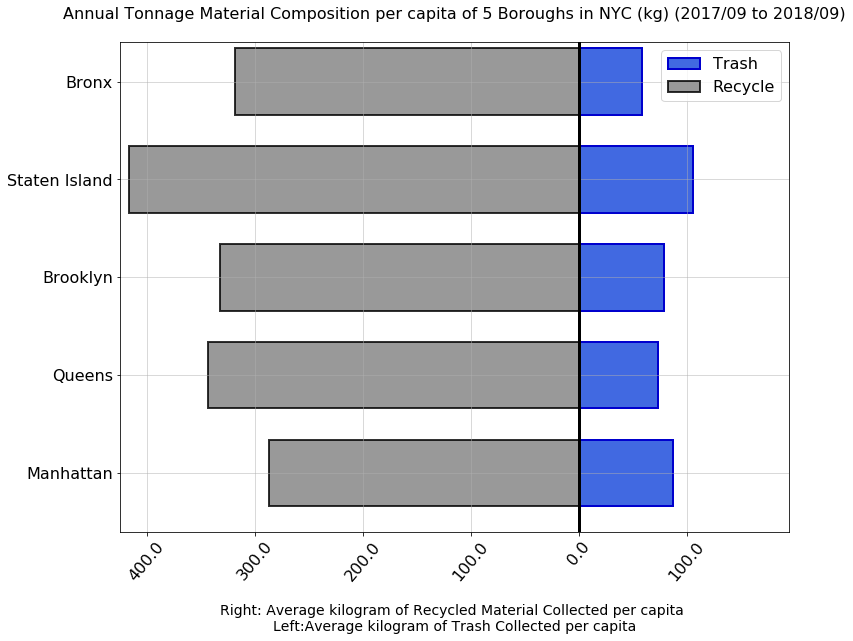

In [43]:
# The coloured bars are not easy to interpret the two categories and therefore, I am changing colour. 
x1=nyc.ix[:4,1]
x2=nyc.ix[:4,2]

# Bar labels for each borough
bar_labels = ['Manhattan','Queens', 'Brooklyn', 'Staten Island', 'Bronx']

plt.figure(figsize=(12,9))

# Set the y position
y_pos = np.arange(len(x1))
plt.yticks(y_pos, bar_labels, fontsize=12)


width = 0.68

# Create a horizontal bar in the position y_pos
color_dict={'#2E8B57','#FFB6C1','#D2691E', '#6495ED', '#8B008B'}
bx=plt.barh(y_pos[4], x1[0], width, align='center', color='#4169E1', linewidth=2, edgecolor='#0000CD')
si=plt.barh(y_pos[3], x1[1], width, align='center', color='#4169E1', linewidth=2, edgecolor='#0000CD')
qns=plt.barh(y_pos[2], x1[2], width, align='center', color='#4169E1', linewidth=2, edgecolor='#0000CD')
bk=plt.barh(y_pos[1], x1[3], width,align='center', color='#4169E1',linewidth=2, edgecolor='#0000CD')
mn=plt.barh(y_pos[0], x1[4], width, align='center', color='#4169E1',linewidth=2, edgecolor='#0000CD')

bx_t=plt.barh(y_pos[4], -x2[0], width, align='center', color='#808080', alpha=0.8,linewidth=2, edgecolor='#000000')
si_t=plt.barh(y_pos[3], -x2[1], width, align='center', color='#808080', alpha=0.8,linewidth=2, edgecolor='#000000')
qns_t=plt.barh(y_pos[2], -x2[2], width, align='center', color='#808080', alpha=0.8,linewidth=2, edgecolor='#000000')
bk_t=plt.barh(y_pos[1], -x2[3], width, align='center', color='#808080', alpha=0.8,linewidth=2, edgecolor='#000000')
mn_t=plt.barh(y_pos[0], -x2[4], width, align='center', color='#808080', alpha=0.8,linewidth=2, edgecolor='#000000')





# labels

plt.xlabel('\nRight: Average kilogram of Recycled Material Collected per capita \nLeft:Average kilogram of Trash Collected per capita', horizontalalignment='center',fontsize=14)
t = plt.title('Annual Tonnage Material Composition per capita of 5 Boroughs in NYC (kg) (2017/09 to 2018/09)\n', fontsize=16)
plt.xlim([-425,195])
plt.xticks(rotation=50, fontsize=16)

# Set positive value on both side of the 0. 
# Reference: https://stackoverflow.com/questions/20393663/convert-negative-y-axis-to-positive-matplotlib
ax = plt.axes()
ax.set_xticklabels([str(abs(x)) for x in ax.get_xticks()])
plt.ylim([-0.6, 4.4])
plt.yticks(fontsize=16)
#plt.legend(bar_labels, fontsize=13,loc=1)

plt.plot([0,0],[-0.8,4.4], 'k', linewidth=3)

plt.legend((bx,bx_t),['Trash','Recycle'], fontsize=16)

plt.grid(alpha=0.6)

plt.show()

## Reference:
Albon, C. (2018). Back to Back Bar plot. Retrieved from: https://chrisalbon.com/python/data_visualization/matplotlib_back_to_back_bar_plot/

Matplotlib.org. (2018). Barchart. Retrieved from: https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html